# Week 6, Section 6, Mini Project 1, Shakespeare

# 1. Download the dataset from the following link:

https://www.kaggle.com/kingburrito666/shakespeare-plays/ \
and replace the line of "with open('data.txt', 'r') as file:" with "with open('alllines.txt', 'r') as file:

# 2. Read the Text
To read the text file of lines from Shakespeare plays, use these lines of code:
#Read the text file as separate lines of text \
with open('data.txt', 'r') as file:

    text = file.read() \
    lines = text.lower().split('\n')

In [1]:
with open('alllines_short.txt', 'r') as file: # alllines_short is a 50 lines only passage of the original text to avoid memory error
    text = file.read()
    lines = text.lower().split('\n') #make all capitals lowercase and split by new line marker 

In [2]:
text

'"ACT I"\n"SCENE I. London. The palace."\n"Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others"\n"So shaken as we are, so wan with care,"\n"Find we a time for frighted peace to pant,"\n"And breathe short-winded accents of new broils"\n"To be commenced in strands afar remote."\n"No more the thirsty entrance of this soil"\n"Shall daub her lips with her own children\'s blood,"\n"Nor more shall trenching war channel her fields,"\n"Nor bruise her flowerets with the armed hoofs"\n"Of hostile paces: those opposed eyes,"\n"Which, like the meteors of a troubled heaven,"\n"All of one nature, of one substance bred,"\n"Did lately meet in the intestine shock"\n"And furious close of civil butchery"\n"Shall now, in mutual well-beseeming ranks,"\n"March all one way and be no more opposed"\n"Against acquaintance, kindred and allies:"\n"The edge of war, like an ill-sheathed knife,"\n"No more shall cut his master. Therefore, friends,"\n"As far as to the sepulc

In [3]:
lines

['"act i"',
 '"scene i. london. the palace."',
 '"enter king henry, lord john of lancaster, the earl of westmoreland, sir walter blunt, and others"',
 '"so shaken as we are, so wan with care,"',
 '"find we a time for frighted peace to pant,"',
 '"and breathe short-winded accents of new broils"',
 '"to be commenced in strands afar remote."',
 '"no more the thirsty entrance of this soil"',
 '"shall daub her lips with her own children\'s blood,"',
 '"nor more shall trenching war channel her fields,"',
 '"nor bruise her flowerets with the armed hoofs"',
 '"of hostile paces: those opposed eyes,"',
 '"which, like the meteors of a troubled heaven,"',
 '"all of one nature, of one substance bred,"',
 '"did lately meet in the intestine shock"',
 '"and furious close of civil butchery"',
 '"shall now, in mutual well-beseeming ranks,"',
 '"march all one way and be no more opposed"',
 '"against acquaintance, kindred and allies:"',
 '"the edge of war, like an ill-sheathed knife,"',
 '"no more shall c

In [4]:
#Define words, vocabulary size and sequences of words as lines

from keras.preprocessing.text import text_to_word_sequence, Tokenizer
words = text_to_word_sequence(text)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
vocabulary_size = len(tokenizer.word_index) + 1
print(vocabulary_size)

236


In [5]:
sequences = tokenizer.texts_to_sequences(lines)

#Find subsequences 

subsequences = []
for sequence in sequences:
    for i in range(1, len(sequence)):
       subsequence = sequence[:i+1]
       subsequences.append(subsequence)

# 3. Padding Your Sequences
You need to have equal sequences for training; for this, you will apply padding. \
Write these lines of code to implement the padding needed:

from keras.preprocessing.sequence import pad_sequences \
sequence_length = max([len(sequence) for sequence in sequences]) \
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')  

In [6]:
# from keras.preprocessing.sequence import pad_sequences
# received an error message 'cannot import name 'pad_sequences' from 'keras.preprocessing.sequence''

# instead used the below code
from keras.utils import pad_sequences 

# Use a loop to find the longest subsequence
sequence_length = max([len(sequence) for sequence in sequences])
print(sequence_length)

sequences  = pad_sequences(subsequences, maxlen = sequence_length, padding = "pre")

16


# 4. Encode the Target Labels
Use these lines of code to encode your labels for training: \
from keras.utils import to_categorical \
x, y = sequences[:,:-1],sequences[:,-1] \
y = to_categorical(y, num_classes=vocabulary_size)


In [7]:
from keras.utils import to_categorical

x , y = sequences[:, :-1], sequences[:, -1]

print(x.shape, y.shape)

(317, 15) (317,)


In [8]:
y = to_categorical(y, num_classes = vocabulary_size)

y

# reduced the text size. 
# with alllines Received a MemoryError: Unable to allocate 67.6 GiB for an array with shape (709820, 25576) and data type float32

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Define an RNN with the following layers:
An embedding layer with the following parameters: \
The input dimension is vocabulary_size \
The output dimension is 100 \
The input length is sequence_length - 1 \
An LSTM layer with 100 units \
A dropout layer with a dropout rate of 10% \
A dense layer with the following parameters: \
Activation function is softmax \
The number of units is vocabulary_size

In [9]:
from keras.models import Sequential
model = Sequential()

from keras.layers import Embedding, LSTM, Dropout, Dense

model.add(Embedding(input_dim = vocabulary_size,
                   output_dim = 100,
                   input_length = sequence_length - 1))
model.add(LSTM(units = 100))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = vocabulary_size, activation = "softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           23600     
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 236)               23836     
                                                                 
Total params: 127,836
Trainable params: 127,836
Non-trainable params: 0
_________________________________________________________________


# 5. Choosing Hyperparameters
Build the network using the following parameters: \
Optimizer: Adam \
Loss function: categorical_crossentropy \
Metrics: accuracy \
Epochs: 500

In [11]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

# 6. Training Network
Use Keras to implement the network described and train your data. \
Note: your code should return the model.

In [12]:
model.fit(x, y, epochs=500)

Epoch 1/500
10/10 [==============================] - 3s 17ms/step - loss: 5.4618 - accuracy: 0.0347
Epoch 2/500
10/10 [==============================] - 0s 16ms/step - loss: 5.4334 - accuracy: 0.0410
Epoch 3/500
10/10 [==============================] - 0s 14ms/step - loss: 5.3280 - accuracy: 0.0442
Epoch 4/500
10/10 [==============================] - 0s 18ms/step - loss: 5.2324 - accuracy: 0.0379
Epoch 5/500
10/10 [==============================] - 0s 18ms/step - loss: 5.1800 - accuracy: 0.0505
Epoch 6/500
10/10 [==============================] - 0s 17ms/step - loss: 5.1367 - accuracy: 0.0536
Epoch 7/500
10/10 [==============================] - 0s 18ms/step - loss: 5.1175 - accuracy: 0.0536
Epoch 8/500
10/10 [==============================] - 0s 16ms/step - loss: 5.1077 - accuracy: 0.0536
Epoch 9/500
10/10 [==============================] - 0s 15ms/step - loss: 5.0657 - accuracy: 0.0599
Epoch 10/500
10/10 [==============================] - 0s 14ms/step - loss: 5.0626 - accuracy: 0.0631

10/10 [==============================] - 0s 14ms/step - loss: 0.5504 - accuracy: 0.9495
Epoch 83/500
10/10 [==============================] - 0s 14ms/step - loss: 0.5277 - accuracy: 0.9432
Epoch 84/500
10/10 [==============================] - 0s 15ms/step - loss: 0.5146 - accuracy: 0.9590
Epoch 85/500
10/10 [==============================] - 0s 14ms/step - loss: 0.5067 - accuracy: 0.9464
Epoch 86/500
10/10 [==============================] - 0s 13ms/step - loss: 0.4852 - accuracy: 0.9464
Epoch 87/500
10/10 [==============================] - 0s 15ms/step - loss: 0.4875 - accuracy: 0.9432
Epoch 88/500
10/10 [==============================] - 0s 13ms/step - loss: 0.4641 - accuracy: 0.9527
Epoch 89/500
10/10 [==============================] - 0s 13ms/step - loss: 0.4602 - accuracy: 0.9432
Epoch 90/500
10/10 [==============================] - 0s 14ms/step - loss: 0.4384 - accuracy: 0.9495
Epoch 91/500
10/10 [==============================] - 0s 14ms/step - loss: 0.4370 - accuracy: 0.9432
Epo

10/10 [==============================] - 0s 19ms/step - loss: 0.1382 - accuracy: 0.9527
Epoch 163/500
10/10 [==============================] - 0s 18ms/step - loss: 0.1384 - accuracy: 0.9464
Epoch 164/500
10/10 [==============================] - 0s 18ms/step - loss: 0.1477 - accuracy: 0.9432
Epoch 165/500
10/10 [==============================] - 0s 18ms/step - loss: 0.1391 - accuracy: 0.9527
Epoch 166/500
10/10 [==============================] - 0s 17ms/step - loss: 0.1387 - accuracy: 0.9558
Epoch 167/500
10/10 [==============================] - 0s 18ms/step - loss: 0.1356 - accuracy: 0.9527
Epoch 168/500
10/10 [==============================] - 0s 18ms/step - loss: 0.1428 - accuracy: 0.9495
Epoch 169/500
10/10 [==============================] - 0s 19ms/step - loss: 0.1356 - accuracy: 0.9621
Epoch 170/500
10/10 [==============================] - 0s 19ms/step - loss: 0.1405 - accuracy: 0.9432
Epoch 171/500
10/10 [==============================] - 0s 19ms/step - loss: 0.1382 - accuracy: 0

10/10 [==============================] - 0s 14ms/step - loss: 0.1056 - accuracy: 0.9464
Epoch 243/500
10/10 [==============================] - 0s 13ms/step - loss: 0.1038 - accuracy: 0.9495
Epoch 244/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0959 - accuracy: 0.9527
Epoch 245/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0980 - accuracy: 0.9527
Epoch 246/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0969 - accuracy: 0.9527
Epoch 247/500
10/10 [==============================] - 0s 13ms/step - loss: 0.1018 - accuracy: 0.9432
Epoch 248/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0940 - accuracy: 0.9527
Epoch 249/500
10/10 [==============================] - 0s 14ms/step - loss: 0.1002 - accuracy: 0.9495
Epoch 250/500
10/10 [==============================] - 0s 13ms/step - loss: 0.1005 - accuracy: 0.9495
Epoch 251/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0928 - accuracy: 0

10/10 [==============================] - 0s 14ms/step - loss: 0.0863 - accuracy: 0.9432
Epoch 323/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0854 - accuracy: 0.9495
Epoch 324/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0894 - accuracy: 0.9464
Epoch 325/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0858 - accuracy: 0.9558
Epoch 326/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0876 - accuracy: 0.9527
Epoch 327/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0864 - accuracy: 0.9464
Epoch 328/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0795 - accuracy: 0.9685
Epoch 329/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0812 - accuracy: 0.9495
Epoch 330/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0819 - accuracy: 0.9590
Epoch 331/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0933 - accuracy: 0

10/10 [==============================] - 0s 12ms/step - loss: 0.0794 - accuracy: 0.9558
Epoch 403/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0802 - accuracy: 0.9558
Epoch 404/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0832 - accuracy: 0.9464
Epoch 405/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0877 - accuracy: 0.9401
Epoch 406/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0791 - accuracy: 0.9527
Epoch 407/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0742 - accuracy: 0.9527
Epoch 408/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0816 - accuracy: 0.9432
Epoch 409/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0775 - accuracy: 0.9527
Epoch 410/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0784 - accuracy: 0.9527
Epoch 411/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0785 - accuracy: 0

10/10 [==============================] - 0s 12ms/step - loss: 0.0711 - accuracy: 0.9527
Epoch 483/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0755 - accuracy: 0.9495
Epoch 484/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0788 - accuracy: 0.9432
Epoch 485/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0769 - accuracy: 0.9527
Epoch 486/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0786 - accuracy: 0.9464
Epoch 487/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0683 - accuracy: 0.9590
Epoch 488/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0712 - accuracy: 0.9527
Epoch 489/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0745 - accuracy: 0.9495
Epoch 490/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0747 - accuracy: 0.9527
Epoch 491/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0796 - accuracy: 0

In [13]:
loss, accuracy = model.evaluate(x, y)

10/10 [==============================] - 1s 8ms/step - loss: 0.0710 - accuracy: 0.9558


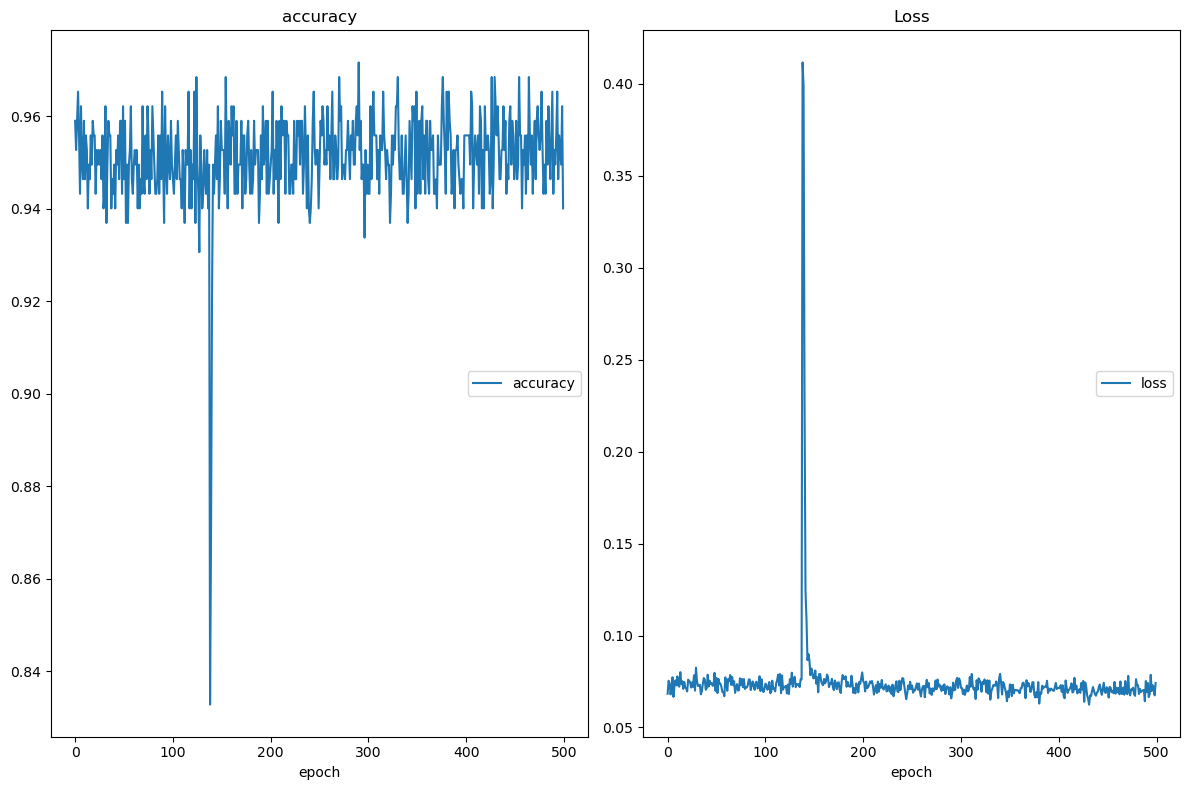

accuracy
	accuracy         	 (min:    0.833, max:    0.972, cur:    0.940)
Loss
	loss             	 (min:    0.062, max:    0.412, cur:    0.074)
10/10 [==============================] - 1s 60ms/step - loss: 0.0742 - accuracy: 0.9401


In [15]:
from livelossplot import PlotLossesKeras

model.fit(x, y,
         callbacks = [PlotLossesKeras()],
         epochs = 500)